In [1]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
from numpy.linalg import solve # pour travailler des matrix

In [ ]:
X = [2,10,2,10]
Y=[10,10,11,11]

A = np.array([[X[0],1,0,0,0,0,0,0],
             [X[1],1,0,0,0,0,0,0],
             [0,0,X[0],1,0,0,0,0],
             [0,0,X[1],1,0,0,0,0],
             [0,0,0,0,X[0],1,0,0],
             [0,0,0,0,X[1],1,0,0],
             [0,0,0,0,0,0,X[0],1],
             [0,0,0,0,0,0,X[1],1]])

b = np.array([Y[0],Y[1],Y[2],Y[3],Y[0],Y[3],Y[1],Y[2]])

S = solve(A, b)

def A(x): return S[0]*x+S[1]
def B(x): return S[2]*x+S[3]
def C(x): return S[4]*x+S[5]
def D(x): return S[6]*x+S[7]

Va = np.linspace(X[0], X[1], 100)
Vb = np.linspace(X[1], X[2], 100)
Vc = np.linspace(X[2], X[3], 100)
Vd = np.linspace(X[3], X[0], 100)
plt.plot(X, Y, "+r")
plt.plot(Va, A(Va), "-b")
plt.plot(Vb, B(Vb), "-y")
plt.plot(Vc, C(Vc), "-g")
plt.plot(Vd, D(Vd), "-p")

print(S)

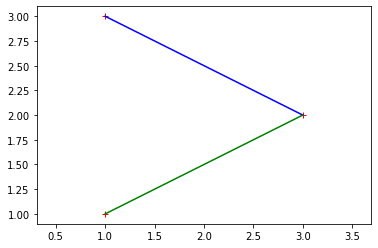

In [80]:
X = [1,1,3]
Y = [3,1,2]

pointEye = [(1,3),(1,1),(3,2)]
def drawEye(points):
    if len(points) <= 3:
        x0 = points[0][0]
        y0 = points[0][1]
        x1 = points[1][0]
        y1 = points[1][1]
        x2 = points[2][0]
        y2 = points[2][1]
        A = np.array([[x0,1,0,0],[x2,1,0,0],[0,0,x1,1],[x2,1,-x2,-1]])
        b = np.array([y0,y2,y1,0])
        S = solve(A, b)
        Va = np.linspace(x0, x2, 100)
        Vb = np.linspace(x1, x2, 100)
        def A(x): return S[0]*x+S[1]
        def B(x): return S[2]*x+S[3]
        plt.plot(X, Y, "+r")
        plt.plot(Va, A(Va), "-b")
        plt.plot(Vb, B(Vb), "-g")
        plt.axis('equal')

drawEye(pointEye)

In [ ]:
pointBordCup = [(1,3),(3,3),(3.5,2),(3,1)]
def drawBordCup(points):
    if len(points) <= 4:
        x0 = points[0][0]
        y0 = points[0][1]
        x1 = points[1][0]
        y1 = points[1][1]
        x2 = points[2][0]
        y2 = points[2][1]
        x3 = points[3][0]
        y3 = points[3][1]
        alpha1 = 0
        A = np.array([[1,x0,0,0,0,0],
                      [1,x1,0,0,0,0],
                      [0,1,0,-1,-2*x1,-3*(x1**2)],
                      [0,0,1,0,-2*x1,-6*x1],
                      [0,0,1,x1,x1**2,x1**3],
                      [0,0,1,x2,x2**2,x2**3]])
        b = np.array([y0,y1,alpha1,0,y2,y3])
        S = solve(A, b)
        print(S)
        Va = np.linspace(x0, x1, 10)
        Vb = np.linspace(x1, x2, 10)
        def A(x): return S[0]+S[1]*x
        def B(x): return S[2]+S[3]*x+S[4]*x**2+S[5]*x**3
       
        plt.plot(Va, A(Va), "*b")
        plt.plot(Vb, B(Vb), "*g")
        plt.plot([x0,x1,x2], [y0,y1,y2], "*r")
        plt.axis('equal')

drawBordCup(pointBordCup)

In [43]:
def drawSpline(points, showPoint=True):
    Nb=len(points)-1
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
  
    if showPoint: plt.plot(X,Y,"*r")

    t = np.linspace(0,1,Nb+1)
    Mat0 = np.zeros((8*Nb,8*Nb))
    b = np.zeros(8*Nb)

    Mat0[0,0:4] = [1,t[0],t[0]**2,t[0]**3]
    Mat0[1,4:8] = [1,t[0],t[0]**2,t[0]**3]
    Mat0[2,0:4] = [0,0,2,6*t[0]]  
    Mat0[3,4:8] = [0,0,2,6*t[0]]  
    b[0:4] = [X[0],Y[0],0,0]

    for i in range(1,Nb):
        b[8*i-4:8*i+4] = [X[i],Y[i],X[i],Y[i],0,0,0,0]
        Mat0[8*i-4,8*(i-1)+0:8*(i-1)+4] = [1,t[i],t[i]**2,t[i]**3]  
        Mat0[8*i-3,8*(i-1)+4:8*(i-1)+8] = [1,t[i],t[i]**2,t[i]**3]
        Mat0[8*i-2,8*(i-1)+8:8*(i-1)+12] = [1,t[i],t[i]**2,t[i]**3]  
        Mat0[8*i-1,8*(i-1)+12:8*(i-1)+16] = [1,t[i],t[i]**2,t[i]**3]
        Mat0[8*i+0,8*(i-1)+0:8*(i-1)+4] = [0,1,2*t[i],3*t[i]**2]    
        Mat0[8*i+0,8*(i-1)+8:8*(i-1)+12] = [0,-1,-2*t[i],-3*t[i]**2]  
        Mat0[8*i+1,8*(i-1)+4:8*(i-1)+8] = [0,1,2*t[i],3*t[i]**2]    
        Mat0[8*i+1,8*(i-1)+12:8*(i-1)+16] = [0,-1,-2*t[i],-3*t[i]**2]  
        Mat0[8*i+2,8*(i-1)+0:8*(i-1)+4] = [0,0,2,6*t[i]]   
        Mat0[8*i+2,8*(i-1)+8:8*(i-1)+12] = [0,0,-2,-6*t[i]]
        Mat0[8*i+3,8*(i-1)+4:8*(i-1)+8] = [0,0,2,6*t[i]]    
        Mat0[8*i+3,8*(i-1)+12:8*(i-1)+16] = [0,0,-2,-6*t[i]]  


    Mat0[8*Nb-4,8*Nb-8:8*Nb-4] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
    Mat0[8*Nb-3,8*Nb-4:8*Nb] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
    Mat0[8*Nb-2,8*Nb-8:8*Nb - 4] = [0,0,2,6*t[Nb]]  
    Mat0[8*Nb-1,8*Nb-4:8*Nb] = [0,0,2,6*t[Nb]]  
    b[8*Nb-4:8*Nb] = [X[Nb],Y[Nb],0,0]
    print(b)


    Sol = solve(Mat0,b)

    for i in range(0,Nb):
        def S(x): return [Sol[8*i+0] + Sol[8*i+1]*x + Sol[8*i+2]*x**2 + Sol[8*i+3]*x**3,Sol[8*i+4] + Sol[8*i+5]*x + Sol[8*i+6]*x**2 + Sol[8*i+7]*x**3]
        Vx = np.linspace(t[i],t[i+1],100)
        Gamma = S(Vx)
        plt.plot(Gamma[0],Gamma[1],linewidth=1)
        #plt.fill(Gamma[0],Gamma[1],"b")



[0.5 3.5 0.  0.  0.  2.5 0.  2.5 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.
 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.  3.  1.  3.  1.  0.  0.  0.  0.
 4.  2.5 4.  2.5 0.  0.  0.  0.  3.5 3.5 0.  0. ]


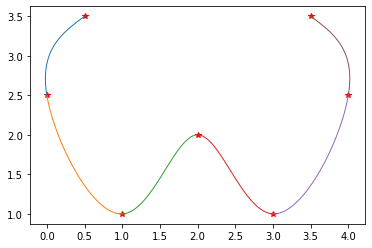

In [44]:
X = [5,1,0,3,6,5]
Y = [1,1,2,2.5,2,1]

pointsBordCup = [(5,1),(1,1),(0,2),(3,2.5),(6,2),(5,1)]
pointLineBordCup = [(2, 10), (10,10)]
pointsBordCup = [(10,10),(2,10),(1,10.5),(2,11),(6,11.2),(10,11),(11,10.5),(10,10)]
pointsMouth = [(0.5,3.5),(0,2.5),(1,1),(2,2),(3,1),(4,2.5),(3.5,3.5)]

drawSpline(pointsMouth)

[-0.75  2.5  -0.75 12.25 -3.5   0.25]


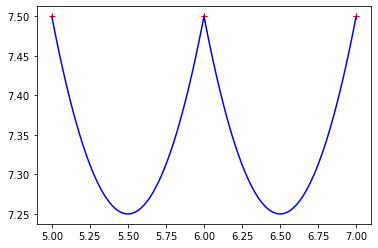

In [89]:
X = [1,3]
Y=[1,1]
alpha = 1
def drawParabol(points, alpha):
    # Créer des points pour dessinner
    X = [t[0] for t in points]
    Y = [t[1] for t in points]
    plt.plot(X, Y, "+r")
    N = len(points)
    if N <= 3: # for only 5 points for now
        A = np.array([[1,X[0],X[0]**2],
                      [1,X[1],X[1]**2],
                      [0,0,2*X[0]]])

        b = np.array([Y[0],Y[1],alpha])
        S = solve(A, b)
        def A(x): return S[0]+S[1]*x+S[2]*x**2
        Va = np.linspace(X[0], X[1], 100)
        plt.plot(Va, A(Va), "-b")

print(S)
p = [(5,7.5),(6,7.5)]
p2 = [(6,7.5),(7,7.5)]
p3 = [(5,1),(7,1)]
p = [(5,7.5),(6,7.5),(7,7.5)]

drawParabol(p,5*2)
drawParabol(p2,6*2)
#drawParabol(p3,5)

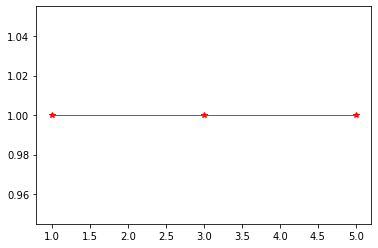

In [53]:
def drawParabol(x, S, N): return sum(S[t]*(x**t) for t in range(N))
def createListX(X, N): return [1*[X[d]**t for t in range(N)] for d in range(N)]
def createListY(Y, N): return [Y[t] for t in range(N)]

def drawMultiplePoint(points,showPoint=True, showBorder=True):
    # Créer des points pour dessinner
    X = [t[0] for t in points]
    Y = [t[1] for t in points]
    N = len(X)
    if showPoint: plt.plot(X,Y, "*r")

    # Créer des listes pour calculer matrix
    A = np.array(createListX(X,N))
    b = np.array(createListY(Y,N))
    S = solve(A,b)
   
    # Position de X pour dessiner avec nombre de points
    Vx = np.linspace(min(X),max(X), 100)
   
    # Position de Y pour dessiner par la définition drawParabol
    Vy = [drawParabol(t,S,N) for t in Vx]
    if showBorder: plt.plot(Vx,Vy,linewidth=1)
    #plt.fill(Vx, Vy)

p = [(1,1),(3,1),(5,1)]
drawMultiplePoint(p)

[-0.75  2.5  -0.75 12.25 -3.5   0.25]


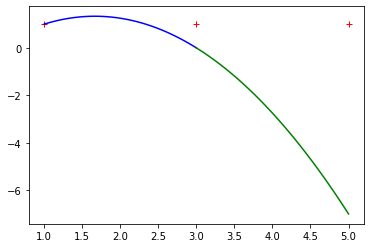

In [68]:
points = [(1,1),(3,1),(5,1)]
alpha0 = 1
alpha1 = -1

X = [t[0] for t in points]
Y = [t[1] for t in points]
plt.plot(X, Y, "+r")
A = np.array([[1,X[0],X[0]**2,0,0,0],
              [0,0,0,1,X[2],X[2]**2],
              [0,1,2*X[1],0,-1,-2*X[1]],
              [1,X[1],X[1]**2,0,0,0],
              [0,1,2*X[0],0,0,0],
              [0,0,0,0,1,2*X[2]]])



b = np.array([Y[0],Y[2],0,0,alpha0,alpha1])

S = solve(A, b)

print(S)

def A(x): return S[0]+S[1]*x+S[2]*x**2
def B(x): return S[3]+S[4]*x+S[5]*x**2

Va = np.linspace(X[0], X[1], 100)
Vb = np.linspace(X[1], X[2], 100)

plt.plot(Va, A(Va), "-b")
plt.plot(Vb, A(Vb), "-g")

[[(1, 3), (1, 1), (3, 2)], [(3, 2), (0, 2), (1, 1)], [(1, 1), (1, 3), (0, 2)]]


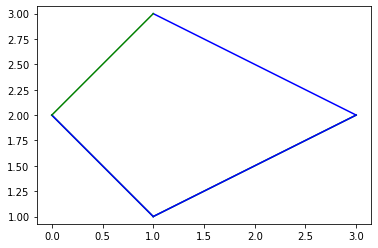

In [100]:
p = [(1,3),(3,2),(1,1),(0,2),(1,3)] # A B X

def toLineList(points):
    newPoints = []
    for i in range(len(points)-2):
        newPoints.append([points[i],points[i+2],points[i+1]])
    return newPoints

def draw2Line(points):
    X = [t[0] for t in points]
    Y = [t[1] for t in points]
    
    if len(points) <= 3:
        A = np.array([[X[0],1,0,0],[X[2],1,0,0],[0,0,X[1],1],[X[2],1,-X[2],-1]])
        b = np.array([Y[0],Y[2],Y[1],0])
        S = solve(A, b)
        Va = np.linspace(X[0], X[2], 100)
        Vb = np.linspace(X[1], X[2], 100)
        def A(x): return S[0]*x+S[1]
        def B(x): return S[2]*x+S[3]
        #plt.plot(X, Y, "+r")
        plt.plot(Va, A(Va), "-b")
        plt.plot(Vb, B(Vb), "-g")
        plt.fill(Va, A(Va),"r")
        plt.axis('equal')
        
def drawMultipleLine(points):
    newPoints = toLineList(points)
    print(newPoints)
    [draw2Line(p) for p in newPoints]
    
drawMultipleLine(p)
    

In [95]:
p = [(1,4),(1,1),(3,1),(3,4)]
p  = [(1,3),(1,1),(3,2)]

def toLineList(points):
    newPoints = []
    for i in range(len(points)-2):
        newPoints.append([points[i],points[i+2],points[i+1]])
    return newPoints
print(toLineList(p))

[[(1, 3), (3, 2), (1, 1)]]


<p align="center">
[logo](https://www.raspberrypi.org/app/uploads/2018/03/RPi-Logo-Reg-SCREEN-199x250.png "Raspberry pi")
</p>

![logo](https://www.raspberrypi.org/app/uploads/2018/03/RPi-Logo-Reg-SCREEN-199x250.png "Raspberry pi")